In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from model_vizualisation_data import ModelVizualizationData

In [2]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 33)

## 1. Preparing Data for Models

In [3]:
X = df.drop(labels=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity','ENERGYSTARScore'], axis=1, inplace=False)

In [4]:
target_siteEnergyuse_log = np.log(df['SiteEnergyUseWN(kBtu)'] + 1)
target_siteEnergyuse = df['SiteEnergyUseWN(kBtu)']

In [5]:
df = df.drop(labels=['ENERGYSTARScore','TotalGHGEmissions','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity'], axis=1, inplace=False)

In [6]:
X

,YearBuilt,NumberofFloors,PropertyGFATotal,ProportionParkingGFA,Energy_Loss(kBtu/sf),ProportionElectricity(kBtu),ProportionNaturalGas(kBtu),ProportionSteamUse(kBtu),Distribution Center,Hospital,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,85,12,88434,0.000000,104.699997,0.529177,0.171177,0.268728,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,11,103566,0.145453,81.499992,0.374270,0.593813,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,10,61320,0.000000,110.699997,0.398590,0.260726,0.318772,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,18,175580,0.353115,96.900009,0.366295,0.600689,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,2,97288,0.382349,178.899994,0.585885,0.374765,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,1,12294,0.000000,99.400009,0.555959,0.345147,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1508,11,1,16000,0.000000,53.000000,0.376335,0.525507,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1509,41,1,13157,0.000000,307.699982,0.296040,0.656408,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1510,26,1,14101,0.000000,55.300003,0.445646,0.473405,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,target_siteEnergyuse_log, test_size=0.2, random_state=42)

In [8]:
#Scaling numeric features using sklearn StandardScalar
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## 2. Build Models

### 2.1 Linear Regression

In [9]:
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y
estimator_linear = lr.fit(X_train_std, y_train)
ypred = lr.predict(X_test_std)
ypred = np.exp(ypred) - 1

#Metrics to evaluate your model
print('LINEAR')
# print('r2 score:',r2_score(y_test, ypred))
# print('mean absolute error',mean_absolute_error(y_test, ypred))
# print('RMSE',np.sqrt(mean_squared_error(y_test, ypred)))

print('r2 score antilog:',r2_score(np.exp(y_test) - 1, ypred))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test) - 1, ypred))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test) - 1,ypred)))

LINEAR
r2 score antilog: 0.2773336032352459
mean absolute error antilog: 1655255.2809111108
RMSE antilog 4115439.705579505


### 2.2 Decision Tree

In [12]:
dt = DecisionTreeRegressor()
estimator_tree= dt.fit(X_train_std, y_train)
yhat = dt.predict(X_test_std)
yhat = np.exp(yhat) - 1


print('DECISION TREE')
# print('r2 score:',r2_score(y_test, yhat))
# print('mean absolute error',mean_absolute_error(y_test, yhat))
# print('RMSE',np.sqrt(mean_squared_error(y_test, yhat)))

print('r2 score antilog:',r2_score(np.exp(y_test) - 1, yhat))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test) - 1, yhat))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test) - 1,yhat)))

DECISION TREE
r2 score antilog: 0.7930835750938878
mean absolute error antilog: 1159915.8409094377
RMSE antilog 2202139.342364825


### 2.3 Random Forest

In [13]:
model_forest = RandomForestRegressor()
estimator_forest = model_forest.fit(X_train_std, y_train)
y_pred_forest = model_forest.predict(X_test_std)
y_pred_forest = np.exp(y_pred_forest) - 1

print('RANDOM FOREST')
# print('R2 score:',r2_score(y_test,y_pred_forest))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_forest))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_forest)))

print('r2 score antilog:',r2_score(np.exp(y_test), y_pred_forest))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test) - 1,y_pred_forest))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_forest)))

RANDOM FOREST
r2 score antilog: 0.8889082446312376
mean absolute error antilog: 778772.7898962826
RMSE antilog 1613571.33126103


#### 2.3 [GridSearchCV] Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
    "criterion"         : ['squared_error'],
    "n_estimators"      : [50,60,70,80],
    "max_features"      : [1.0],
    "min_samples_split" : [2,3,4],
}

grid_forest = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1)

In [15]:
grid_forest.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_features': [1.0],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 60, 70, 80]})

In [16]:
grid_forest.best_score_ , grid_forest.best_params_

(0.9191960597040044,
 {'criterion': 'squared_error',
  'max_features': 1.0,
  'min_samples_split': 3,
  'n_estimators': 80})

In [17]:
for mean, std, params in zip(grid_forest.cv_results_['mean_test_score'],
                            grid_forest.cv_results_['std_test_score'],
                            grid_forest.cv_results_['params']
                            ):
    print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.916 (+/-0.028) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 50}
	accuracy = 0.919 (+/-0.022) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 60}
	accuracy = 0.917 (+/-0.028) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 70}
	accuracy = 0.918 (+/-0.025) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 80}
	accuracy = 0.918 (+/-0.025) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 3, 'n_estimators': 50}
	accuracy = 0.917 (+/-0.027) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 3, 'n_estimators': 60}
	accuracy = 0.917 (+/-0.029) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 3, 'n_estimators': 70}
	accuracy = 0.919 (+/-0.025) for {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples

#### 2.3 [Performance of Grid Search params on test data] Random Forest

In [26]:
y_pred_forest_grid = np.exp(grid_forest.predict(X_test_std)) - 1

In [44]:
from sklearn import metrics
print(metrics.r2_score(np.exp(y_test) - 1, y_pred_forest_grid))
print(mean_absolute_error(np.exp(y_test) -1, y_pred_forest_grid))
print(np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_forest_grid)))

0.882510397795787
807075.0873386107
1659384.501599327


### 2.4 Gradient Boosting

In [28]:
model_gradient = GradientBoostingRegressor(n_estimators=1000,criterion='squared_error',
                                  max_depth=8,min_samples_split=5,
                                  min_samples_leaf=5,max_features=3)

estimator_gradient = model_gradient.fit(X_train_std,y_train)
y_pred_gradient = model_gradient.predict(X_test_std)
y_pred_gradient = np.exp(y_pred_gradient) - 1

print(model_gradient.score(X_test_std, np.exp(y_test)))

print('GRADIENT BOOSTING')
# print('R2 score:',r2_score(y_test,y_pred_gradient))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_gradient))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_gradient)))

print('r2 score antilog:',r2_score(np.exp(y_test) - 1, y_pred_gradient))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test) - 1,y_pred_gradient))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_gradient)))

-0.7459983966704213
GRADIENT BOOSTING
r2 score antilog: 0.9061149422423437
mean absolute error antilog: 790451.1622971991
RMSE antilog 1483356.5434660183


#### 2.4 [GridSearchCV] Gradient Boosting

In [55]:
estimator = GradientBoostingRegressor()
param_grid = {
    "loss"              : ['squared_error','absolute_error'], #mean residuals vs median residuals
    "n_estimators"      : [250,300,400],
    "learning_rate"     : [0.1,0.05],
    "max_features"      : [1.0,15, 25],
    "subsample"         : [1.0, 0.7, 0.3],
    'max_depth'         : [2,3,4,8],
    "min_samples_split" : [2,4],
}

grid_gradient = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

In [56]:
grid_gradient.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': [1.0, 15, 25],
                         'min_samples_split': [2, 4],
                         'n_estimators': [250, 300, 400],
                         'subsample': [1.0, 0.7, 0.3]})

In [57]:
grid_gradient.best_score_ , grid_gradient.best_params_

(0.9391688856477414,
 {'learning_rate': 0.1,
  'loss': 'absolute_error',
  'max_depth': 3,
  'max_features': 25,
  'min_samples_split': 4,
  'n_estimators': 400,
  'subsample': 0.3})

In [58]:
for mean, std, params in zip(grid_gradient.cv_results_['mean_test_score'],
                             grid_gradient.cv_results_['std_test_score'],
                             grid_gradient.cv_results_['params']
                             ):
    print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.919 (+/-0.044) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 1.0}
	accuracy = 0.913 (+/-0.080) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 0.7}
	accuracy = 0.917 (+/-0.055) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 0.3}
	accuracy = 0.922 (+/-0.042) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
	accuracy = 0.915 (+/-0.068) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}
	accuracy = 0.912 (+/-0.072) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 2

##### [RESULT] Accuracy = 0.939 (+/-0.022) for {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 3, 'max_features': 25, 'min_samples_split': 4, 'n_estimators': 400, 'subsample': 0.3}

#### 2.4 [Performance of Grid Search params on test data] Gradient Boosting

In [59]:
y_pred_gradient_grid = np.exp(grid_gradient.predict(X_test_std)) - 1

In [60]:
from sklearn import metrics
print(metrics.r2_score(np.exp(y_test) -1, y_pred_gradient_grid))
print(mean_absolute_error(np.exp(y_test) -1, y_pred_gradient_grid))
print(np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_gradient_grid)))

0.9296005534425831
606239.7146165691
1284493.572180888


## 3. Model Visualization

In [35]:
y_test  = y_test.reset_index(drop= True)

In [36]:
def prep_for_visualization(target_pred,target_test):
    target_pred_as_series = pd.Series(target_pred)
    data_model = pd.concat([target_test, target_pred_as_series], axis=1)
    return ModelVizualizationData(target_pred_as_series, data_model)

In [39]:
def visualize(y_tests, model_visualization_data,title_as_string, color_points_as_string, color_line_as_string):

    plt.scatter(y_tests, model_visualization_data.target_as_serie, c =color_points_as_string)
    line_coords = np.arange(model_visualization_data.data_model.min().min(),
                            model_visualization_data.data_model.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
                color=color_line_as_string, linestyle='--')
    plt.ylabel('Predicted EnergyUse in kBtu', fontsize=14)
    plt.xlabel('Actual EnergyUse in kBtu', fontsize=14)
    plt.title(title_as_string, fontsize=16)
    return plt.show()

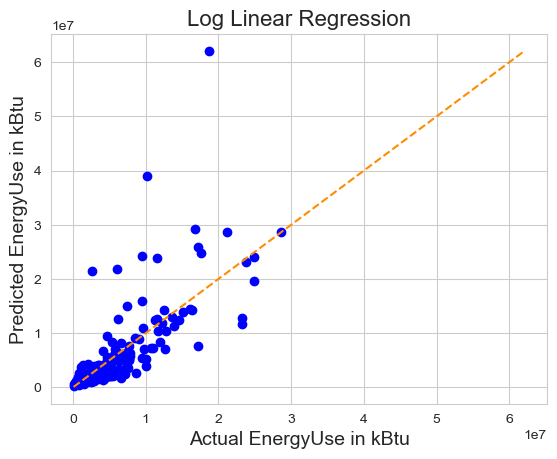

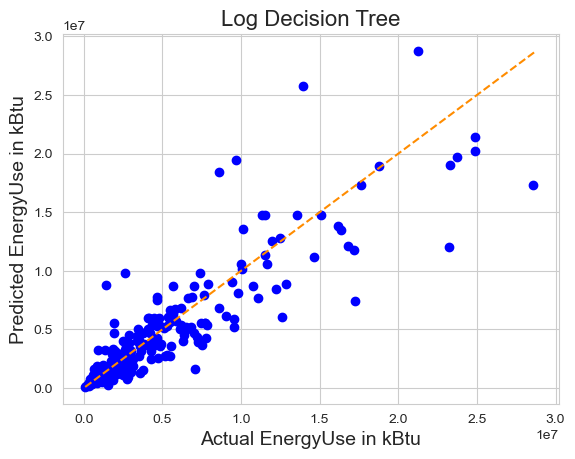

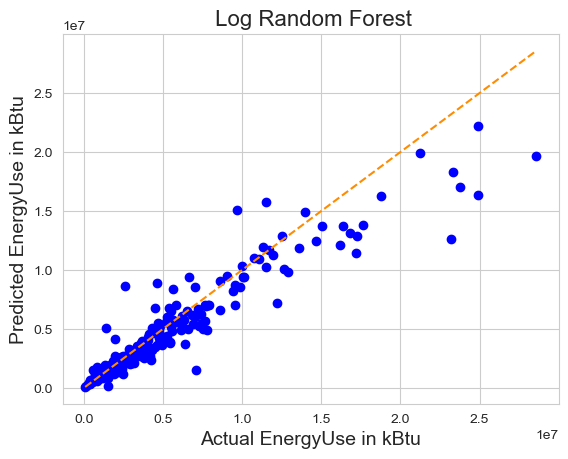

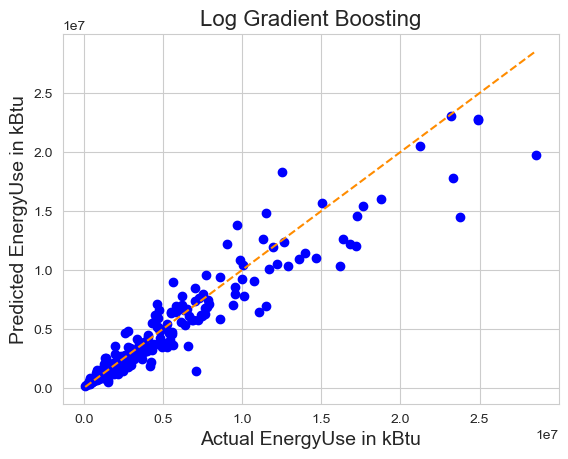

In [66]:
visualize((np.exp(y_test) - 1),prep_for_visualization(ypred,(np.exp(y_test) - 1)),'Log Linear Regression', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(yhat, (np.exp(y_test) - 1)),'Log Decision Tree', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_forest, (np.exp(y_test) - 1)),' Log Random Forest', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_gradient, (np.exp(y_test) - 1)),'Log Gradient Boosting', 'blue', 'darkorange')

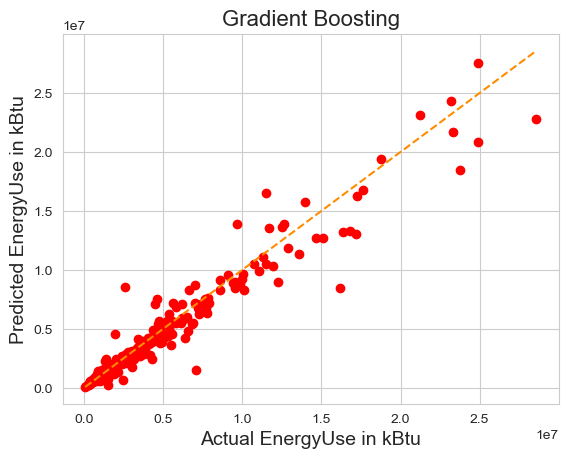

In [48]:
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_gradient_grid, (np.exp(y_test) - 1)),'Gradient Boosting', 'red', 'darkorange')

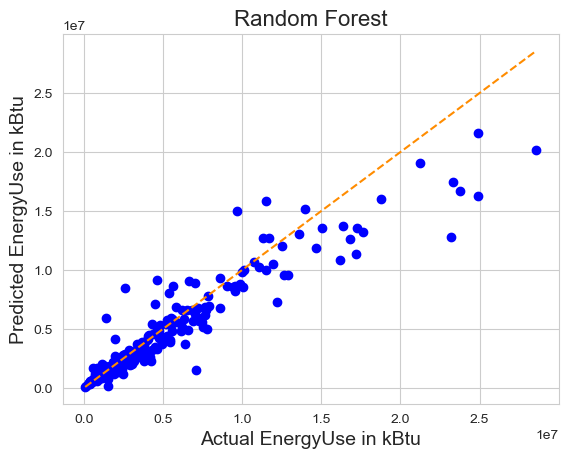

In [47]:
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_forest_grid, (np.exp(y_test) - 1)),'Random Forest', 'blue', 'darkorange')

#### [COMMENT] mes donnees sont trop heterogenes - ex: les valeurs tres eleves sont pas assez representes ce qui fait que les valeurs explosent pour ce type de batiment

#### 3.1 Feature interdependence

<AxesSubplot:>

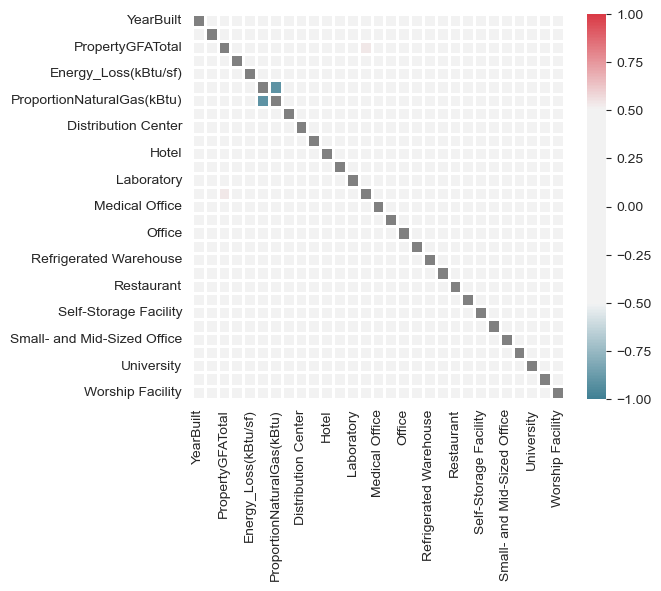

In [168]:
corr = X.corr()

mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=130)
cmap.set_bad('grey')

sns.heatmap(corr,mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=2 )

#### 3.2 Model Deviance for test data

Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


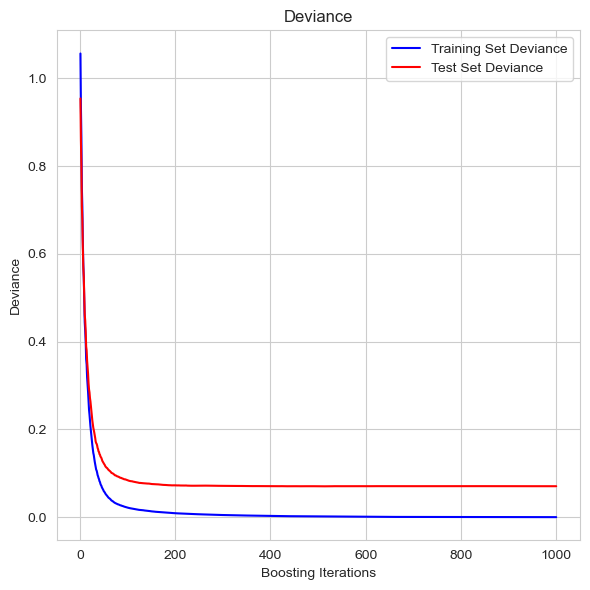

In [170]:
test_score = np.zeros(1000, dtype=np.float64)
for i, y_pred in enumerate(model_gradient.staged_predict(X_test_std)):
    test_score[i] = model_gradient.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(1000) + 1,
    model_gradient.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(1000) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
# on aurait pu arreter l entrainement les iterations a 500 iterations

## 4. Feature Importance Analysis

In [61]:
shap.initjs()

### 4.1 Random Forest

In [172]:
forest_reg_explainer1 = shap.TreeExplainer(model_forest, X_train_std)

In [173]:
sample_idx = 0

shap_vals = forest_reg_explainer1.shap_values(X_test_std[sample_idx])

print("Expected/Base Value : ", forest_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", model_forest.predict(X_test_std[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", forest_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  14.978247928948756

Shap Values for Sample 0 :  [-2.25999305e-04  2.15403622e-03 -7.51516945e-01  5.95724815e-03
 -1.00724538e+00  3.94599104e-01  1.85794343e-01 -6.30413790e-04
 -2.59634772e-03  0.00000000e+00 -9.10832011e-05 -9.39056999e-04
  0.00000000e+00 -1.77434684e-04 -4.54306270e-04 -5.87202231e-04
  4.09941487e-04 -2.43178281e-03  5.39613236e-05 -2.47582863e-05
  0.00000000e+00 -1.49403561e-04  6.99046841e-04 -4.53979149e-05
  8.58113978e-04 -2.86961375e-03 -4.48175939e-05 -2.20128297e-04
  7.43351723e-04]


Prediction From Model                            :  13.799405200893043
Prediction From Adding SHAP Values to Base Value :  13.799267007052466


#### 4.1 [Random Forest] Global Feature Importance

 98%|===================| 1189/1209 [00:20<00:00]        

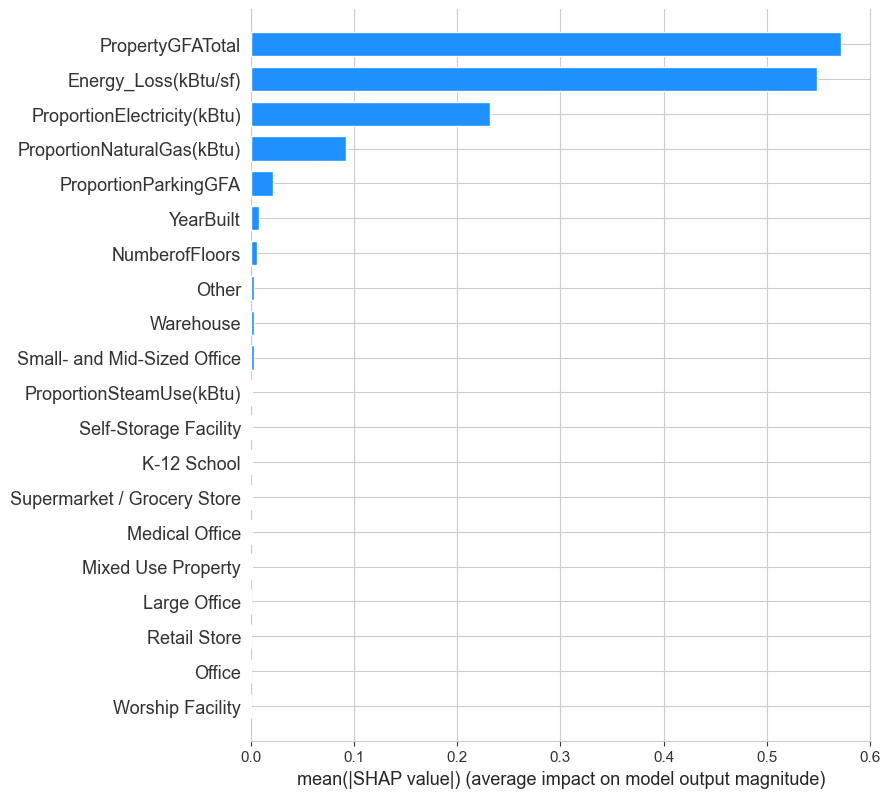

In [174]:
plt.figure(figsize=(8,10))
shap.summary_plot(forest_reg_explainer1.shap_values(X_train_std),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

#### 4.1 [Random Forest] Local Feature Importance

In [67]:
plt.figure(figsize=(8,10))
shap.summary_plot(forest_reg_explainer1.shap_values(X_train_std),
                  features = X_train_std,
                  feature_names=df.columns)

plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

NameError: name 'forest_reg_explainer1' is not defined

<Figure size 800x1000 with 0 Axes>

### 4.2 Gradient Boosting

In [62]:
grad_reg_explainer1 = shap.TreeExplainer(model_gradient, X_train_std)

In [63]:
sample_idx = 0

shap_vals = grad_reg_explainer1.shap_values(X_test_std[sample_idx])

print("Expected/Base Value : ", grad_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", model_gradient.predict(X_test_std[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", grad_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  14.990687880976752

Shap Values for Sample 0 :  [-2.13067419e-02 -1.68684662e-02 -7.19354059e-01  6.28375596e-03
 -8.19807761e-01  4.07426631e-01  1.08428433e-01 -1.80076055e-02
 -1.07934268e-01  0.00000000e+00 -2.15701499e-03  1.61354761e-03
  0.00000000e+00 -7.75880288e-03 -6.45018882e-03  7.91103853e-04
  0.00000000e+00 -2.50141958e-03 -3.23399799e-03  4.97572218e-04
  0.00000000e+00 -1.04888642e-03  4.00117102e-03 -1.03212188e-04
  6.57356176e-03 -9.55972539e-03  3.13615835e-04  7.20171793e-03
  9.57806576e-03]


Prediction From Model                            :  13.807304910129595
Prediction From Adding SHAP Values to Base Value :  13.807304907025788


#### 4.2 [Gradient Boosting] Global Feature Importance

100%|===================| 1203/1209 [02:26<00:00]        

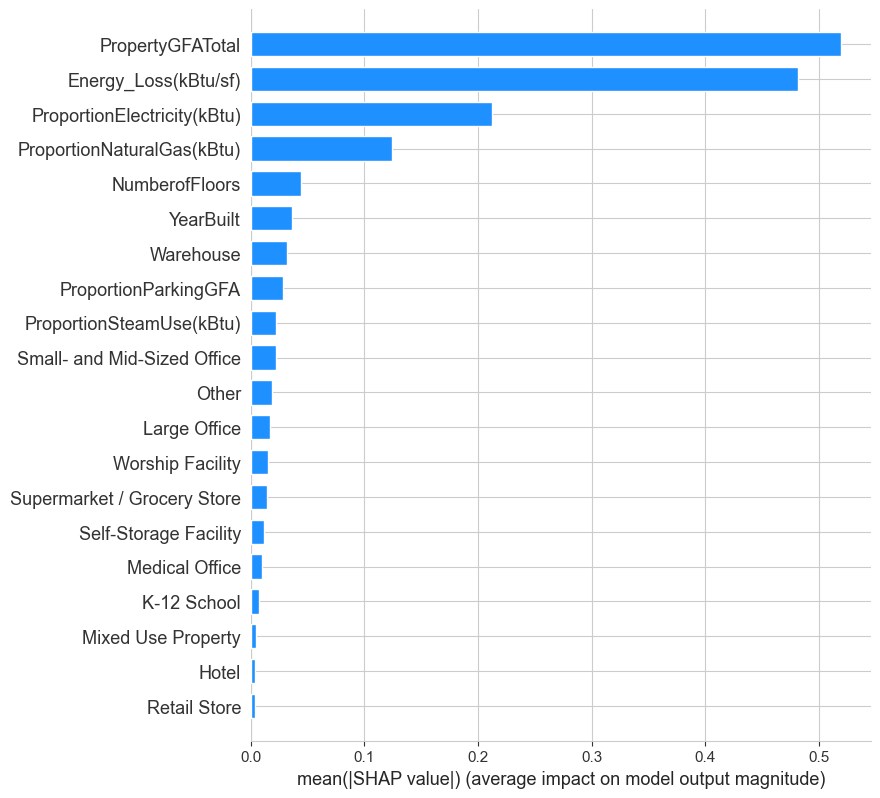

In [64]:
plt.figure(figsize=(8,10))
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

#### 4.4 [Gradient Boosting] Local Feature Importance

 99%|===================| 1200/1209 [02:09<00:00]        

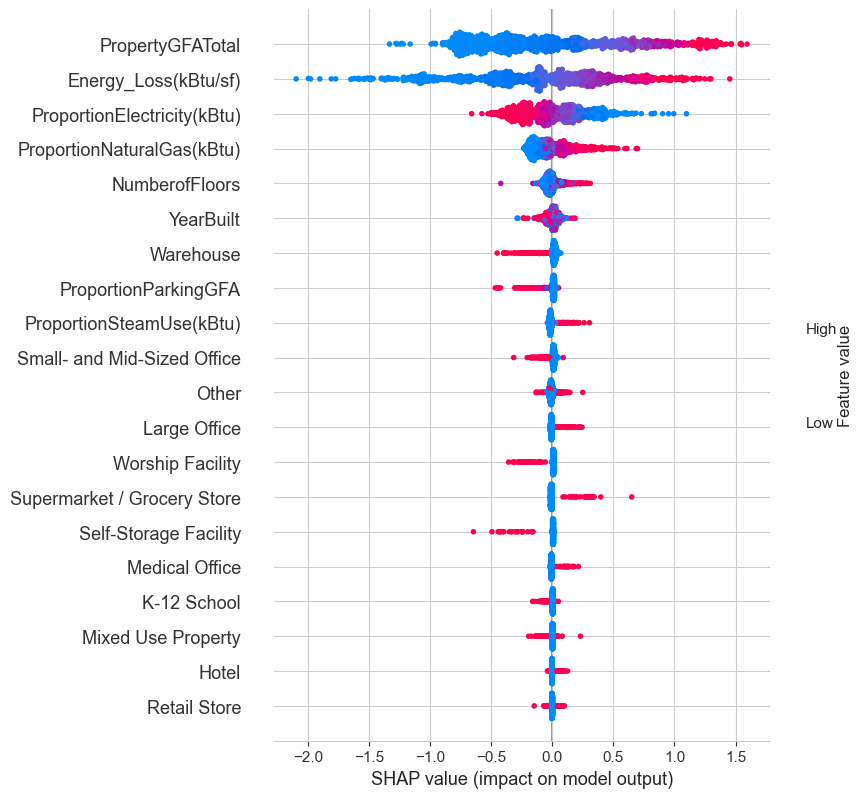

In [65]:
plt.figure(figsize=(8,10))
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std),
                  features = X_train_std,
                  feature_names=df.columns)

plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

##### [COMMENT] Property GFA plus les valeurs sont eleves, plus cela aura un impact positif sur la prediction.

In [71]:
r = permutation_importance(model_gradient, X_test_std, y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

model_gradient.score(X_test_std, y_test)

PropertyGFATotal0.749 +/- 0.053
Waste_energy(kBtu/sf)0.670 +/- 0.065
ProportionElectricity(kBtu)0.134 +/- 0.023
ProportionNaturalGas(kBtu)0.072 +/- 0.015
ProportionParkingGFA0.039 +/- 0.007
NumberofFloors0.023 +/- 0.006
ProportionSteamUse(kBtu)0.019 +/- 0.002
Large Office0.009 +/- 0.003


0.8684301615473399

##### [COMMENT] Feature importance is the increase in model error when the feature’s information is destroyed.

The permutation feature importance takes into account:
- the main feature effect
- the interaction effects on model performance.
=> The importance of the interaction between two features is included in the importance measurements of both features. This means that the feature importances do not add up to the total drop in performance, but the sum is larger.
=> Only if there is no interaction between the features, as in a linear model, the importances add up approximately.